In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [7]:
class AgentState(TypedDict):
    message : str

def greeting_node(state : AgentState) -> AgentState:
    """
    A simple node that adds a greeting message to the state.
    """
    state['message'] = f"Hey {state['message']}, how can I help you today?\n"

    return state


def compliment_node(state: AgentState) -> AgentState:
    """
    A simple node that adds a compliment message to the state.
    """
    state['message'] += "You are doing an amazing job.\n"
    return state

In [3]:
graph = StateGraph(AgentState)


graph.add_node("greeter", greeting_node)
graph.add_node("complimenter", compliment_node)

graph.set_entry_point("greeter")
graph.add_edge("greeter", "complimenter")
graph.set_finish_point("complimenter")

In [4]:
app = graph.compile()

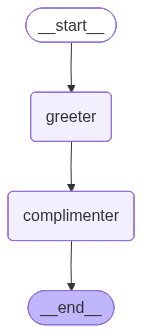

In [34]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
res = app.invoke({"message": "Bob"})

In [6]:
print(res['message'])

Hey Bob, how can I help you today?
You are doing an amazing job.

